# Case Study: Data Exploration

## 01 Project Description

Lending Bank wants to attract term deposits to fund its lending business. In a term deposit, a client agrees to deposit funds and allow the bank to use them for a fixed length of time. In return, the bank will pay interest on the deposit.

The bank’s sales manager wants to market the product to their existing clients. They have historical information from a previous marketing campaign that includes client demographics, prior call experience, market conditions and the interest rate offered.

Using machine learning, help the bank predict which clients are likely to subscribe to a new term deposit. Explain how different features affect the decision.

**Problem**

Perform an analysis of the given data to determine how different features are related to credit card eligibility. Build a machine learning model that can predict the subs_deposit.

**Data Schema**
| NAME                  | DESCRIPTION                                                                                                                                          |
|---------------------- |----------------------------------------------------------------------------------------------------------------------------------------------------- |
| client_id             | unique ID of the client called [unique key]                                                                                                          |
| age_bracket           | age bracket of the contacted client (in years)                                                                                                       |
| job                   | job type of the contacted client                                                                                                                     |
| marital               | marital status of the contacted client                                                                                                               |
| education             | highest level of education done by the client                                                                                                        |
| has_housing_loan      | whether the client has a house loan                                                                                                                  |
| has_personal_loan     | whether the client has a personal loan                                                                                                               |
| prev_call_duration    | last contact duration (value = 0 if the client has not been contacted ever)                                                                          |
| contact_date          | date at which contact was made with the client (YYYY-MM-DD)                                                                                          |
| days_since_last_call  | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  |
| num_contacts_prev     | number of contacts performed before this campaign and for this client (numeric)                                                                      |
| poutcome              | outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")                                                          |
| cpi                   | standing consumer price index before the call (monthly indicator)                                                                                    |
| subs_deposit          | Did the client subscribe to the term deposit? (binary: 1,0) [dependent variable]                                                                     |


## 02 Data Exploration

This section we will explore the data and get to know the data features.

In [7]:
import pandas as pd
data_filepath = '../data/raw/train.csv'

# Read just the fist 10 rows to understand the sample values.
df_preview = pd.read_csv(data_filepath, nrows=10)
display(df_preview.head())

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
0,41020,41-60,white-collar,divorced,bachelors,yes,no,283,3,1,success,07/09/18,92.379,1
1,23720,60+,other,divorced,secondary,no,yes,169,6,2,success,05/07/18,94.215,1
2,29378,41-60,white-collar,married,bachelors,no,no,552,999,0,nonexistent,01/08/18,93.444,1
3,36636,25-40,technician,single,senior_secondary,yes,yes,206,999,0,nonexistent,02/11/18,93.200,0
4,38229,18-24,white-collar,single,bachelors,no,no,341,999,0,nonexistent,04/04/18,93.075,1


In [8]:
df_preview.head(5).T.to_csv('../reports/df_review_small.csv')

Base on the above description, we can see that the data set contains the following features:

- client_id: 5 digit string, unique identifier for each client
- age_bracket: categorical, string, age bracket of the client
- job: categorical, string, job of the client
- marital: categorical, string, marital status of the client
- education: categorical, string, education of the client
- has_housing_load: categorical, string, whether the client has a housing loan (check binary)
- has_car_loan: categorical, string, whether the client has a car loan (check binary)
- has_personal_loan: categorical, string, whether the client has a personal loan (check binary)
- pre_call_duration: numeric, duration of the client’s prior call experience, check the maximum value (seconds or minutes ?).
- days_since_last_call: numeric, number of days since the client’s last call
- poutcome: categorical, string, outcome of the client’s prior call (aka. previous call outcome)
- contact_data: date, date of the client’s last call, format DD/MM/YY, e.g. 07/09/18 (check day first)
- cpi: numeric, consumer price index (CPI) of the client’s last call
- sub_deposit: categorical, string, whether the client subscribes to a term deposit (check binary)

In [210]:
column_names = list(df_preview.columns.values)
# column_names # just to make it easier to copy and paste in the next cell.

Now, read the data with data type and parse the data to get the data in the right format.

In [3]:
sample_type = {
    'client_id': 'string',
 'age_bracket': 'string',
 'job': 'string',
 'marital': 'string',
 'education': 'string',
 'has_housing_loan': 'string',
 'has_personal_loan': 'string',
 'prev_call_duration': 'int', # ! check the maximum value
 'days_since_last_call': 'int', # ! check the maximum value
 'num_contacts_prev':'int', # ! check the maximum value
 'poutcome': 'string',
 'contact_date': 'str',
 'cpi': 'float',
 'subs_deposit':'int', # ! check the binary, this could be the target label.
}

df_raw = pd.read_csv(data_filepath, dtype=sample_type, parse_dates=['contact_date'], infer_datetime_format=True)
display(df_raw.head())

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
0,41020,41-60,white-collar,divorced,bachelors,yes,no,283,3,1,success,2018-07-09,92.379,1
1,23720,60+,other,divorced,secondary,no,yes,169,6,2,success,2018-05-07,94.215,1
2,29378,41-60,white-collar,married,bachelors,no,no,552,999,0,nonexistent,2018-01-08,93.444,1
3,36636,25-40,technician,single,senior_secondary,yes,yes,206,999,0,nonexistent,2018-02-11,93.200,0
4,38229,18-24,white-collar,single,bachelors,no,no,341,999,0,nonexistent,2018-04-04,93.075,1


In [5]:
display(df_raw.head().T)

,0,1,2,3,4
client_id,41020,23720,29378,36636,38229
age_bracket,41-60,60+,41-60,25-40,18-24
job,white-collar,other,white-collar,technician,white-collar
marital,divorced,divorced,married,single,single
education,bachelors,secondary,bachelors,senior_secondary,bachelors
has_housing_loan,yes,no,no,yes,no
has_personal_loan,no,yes,no,yes,no
prev_call_duration,283,169,552,206,341
days_since_last_call,3,6,999,999,999
num_contacts_prev,1,2,0,0,0


In [4]:
# Check the data types 
display(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   client_id             4000 non-null   string        
 1   age_bracket           4000 non-null   string        
 2   job                   4000 non-null   string        
 3   marital               4000 non-null   string        
 4   education             4000 non-null   string        
 5   has_housing_loan      4000 non-null   string        
 6   has_personal_loan     4000 non-null   string        
 7   prev_call_duration    4000 non-null   int64         
 8   days_since_last_call  4000 non-null   int64         
 9   num_contacts_prev     4000 non-null   int64         
 10  poutcome              4000 non-null   string        
 11  contact_date          4000 non-null   datetime64[ns]
 12  cpi                   4000 non-null   float64       
 13  subs_deposit      

None

## 03 Raw Data Profiling  
Data Profiling is a process of analyzing the data to find out the data types, values, distributions and their internal relationships.

In [213]:
# from pandas_profiling import ProfileReport
# output_dir = '../reports/data_profiling.html'
# profile = ProfileReport(df_raw,   title='Data Profiling Report', html={'style':{'full_width':True}})
# profile.to_file(output_dir)

## 04: Feature Engineering

This step is to review the feature values and find the insights from the data. 

Understanding the data: categorical features, min/max values of the features, missing values or outliers, etc.

In [214]:
# Make a copy of the dataframe to work with and always keep the original one intact.
df_data = df_raw.copy()

### 04.0 Sample ID
#### client_id

Id is not used in the model, so we can drop it later in modelling, but let check the id uniqueness.

In [215]:
# print(df_raw.client_id.describe())
## Client ID is the unique identifier for each client. Thus 4000 unique client IDs (hashable).
assert len(df_raw.client_id.unique()) == len(df_raw), 'client_id is not unique'

# df_raw.client_id.describe(include='all')
# We can also check the ID distribution
df_temp = df_raw.client_id.astype('int')
# ax = df_temp.hist()

## show client with min and max ID
display(df_raw[df_raw.client_id == str(df_temp.min())])
display(df_raw[df_raw.client_id == str(df_temp.max())])

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
1119,17,41-60,blue-collar,married,secondary,yes,yes,440,999,0,nonexistent,2018-07-05,93.994,0


,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
2571,41186,41-60,other,married,masters,yes,no,315,999,0,nonexistent,2018-03-09,94.199,1


In [216]:
df_data.set_index('client_id', inplace=True)

In [217]:
df_data.head()

,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
client_id,,,,,,,,,,,,,
41020,41-60,white-collar,divorced,bachelors,yes,no,283,3,1,success,2018-07-09,92.379,1
23720,60+,other,divorced,secondary,no,yes,169,6,2,success,2018-05-07,94.215,1
29378,41-60,white-collar,married,bachelors,no,no,552,999,0,nonexistent,2018-01-08,93.444,1
36636,25-40,technician,single,senior_secondary,yes,yes,206,999,0,nonexistent,2018-02-11,93.200,0
38229,18-24,white-collar,single,bachelors,no,no,341,999,0,nonexistent,2018-04-04,93.075,1


### 04.1: Category Features

#### age_bracket

age_bracket is the categorical feature, so it needs to be encoded.

In [218]:
# check the types
df_raw.age_bracket.value_counts(), df_raw.age_bracket.value_counts().sum(), df_raw.age_bracket.unique()

(25-40    2161
 41-60    1544
 18-24     148
 60+       147
 Name: age_bracket, dtype: Int64,
 4000,
 <StringArray>
 ['41-60', '60+', '25-40', '18-24']
 Length: 4, dtype: string)

Age has its own meanings in increasing order.  

We see there are 4 age brackets: ['18-24', '25-40', '41-60', '60+'].

It can be encoded as: [1, 2, 3, 4] in the same order.

Other cases we mark it as [2] '25-40' which is one with the most clients.

In [219]:
def age_bracket_encoder(age_bracket):
    age_bracket_to_int_dict = {
        '18-24': 1,
        '25-40': 2,
        '41-60': 3,
        '60+': 4,
    }
    if age_bracket in age_bracket_to_int_dict:
        return age_bracket_to_int_dict[age_bracket]
    else:
        return 2
df_data['age_bracket'] = df_data.apply(
    lambda x: age_bracket_encoder(x['age_bracket']), axis=1 )

In [220]:
# check the NULL values
display(df_data[df_data.age_bracket.isna()])

,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
client_id,,,,,,,,,,,,,


#### Job

Job is categorical, so we need to encode it.

In [221]:
# check the types
df_raw.job.value_counts(), df_raw.job.value_counts().sum(), df_raw.job.unique()


(white-collar     1366
 blue-collar       769
 technician        640
 other             503
 pink-collar       455
 self-employed     153
 entrepreneur      114
 Name: job, dtype: Int64,
 4000,
 <StringArray>
 [ 'white-collar',         'other',    'technician', 'self-employed',
    'blue-collar',   'pink-collar',  'entrepreneur']
 Length: 7, dtype: string)

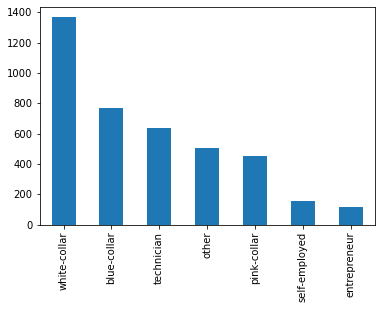

In [222]:
ax  = df_raw.job.value_counts().plot(kind='bar')

In [223]:
df_raw.job.value_counts().index.tolist()

['white-collar',
 'blue-collar',
 'technician',
 'other',
 'pink-collar',
 'self-employed',
 'entrepreneur']

In [224]:
# create a function to encode the job based on the value_counts
# ! we can use the value_counts to create a dictionary to encode the job
# ! we use 1 to represent the most frequent job (white-collar)
# ! But be careful with the numeric value, here does not mean anything, aka, 1 is not less than 2, they just labels.
# ! We can use the job_to_int_dict to encode the job, or we can use the one-hot encoding method to extend the job into a binary vector with 7 values, where white-collar is  b100000, technician is b010000, etc.
job_name_list_sorted = df_raw.job.value_counts().index.tolist()
job_to_int_dict = {}
for k, v in zip(job_name_list_sorted, range(1, len(job_name_list_sorted) + 1)):
    job_to_int_dict[k] = v
print(job_to_int_dict)

def job_encoder(job):
    job_to_int_dict = {'white-collar': 1, 'blue-collar': 2, 'technician': 3, 'other': 4, 'pink-collar': 5, 'self-employed': 6, 'entrepreneur': 7}
    if job in job_to_int_dict:
        return job_to_int_dict[job]
    else:
        return 1  # which is the most frequent job


{'white-collar': 1, 'blue-collar': 2, 'technician': 3, 'other': 4, 'pink-collar': 5, 'self-employed': 6, 'entrepreneur': 7}


In [225]:
# Encoding the job
df_data['job'] = df_data.apply(lambda x: job_encoder(x['job']), axis=1)

#### marital
marital is categorical, so we need to encode it.

(married     2374
 single      1176
 divorced     442
 unknown        8
 Name: marital, dtype: Int64,
 4000,
 <AxesSubplot:>)

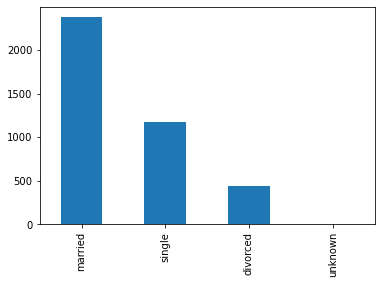

In [226]:
df_raw.marital.value_counts(), df_raw.marital.value_counts().sum(), df_raw.marital.value_counts().plot(kind='bar')

In [227]:
marital_type_dict = {'married': 1, 'single': 2, 'divorced': 3, 'unknown': 4}
df_data['marital'] = df_data.apply(lambda x: marital_type_dict[x['marital']], axis=1)
# note if null set default to 4

#### education  
education is categorical, so we need to encode it.

In [228]:
df_raw.education.value_counts(), df_raw.education.value_counts().sum(), df_raw.education.unique()

(bachelors           1274
 secondary           1114
 senior_secondary     908
 masters              524
 unknown              176
 illiterate             4
 Name: education, dtype: Int64,
 4000,
 <StringArray>
 [       'bachelors',        'secondary', 'senior_secondary',
           'masters',          'unknown',       'illiterate']
 Length: 6, dtype: string)

<AxesSubplot:>

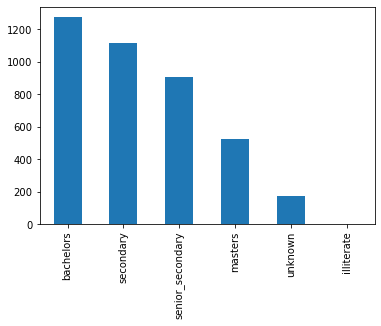

In [229]:
df_raw.education.value_counts().plot(kind='bar')

In [230]:
education_name_list_sorted = df_raw.education.value_counts().sort_values(
    ascending=False).index.tolist()

education_to_int_dict = {}
for k, v in zip(education_name_list_sorted,
                range(1,
                      len(education_name_list_sorted) + 1)):
    education_to_int_dict[k] = v
# education_to_int_dict['unknown']= None
print(education_to_int_dict)

{'bachelors': 1, 'secondary': 2, 'senior_secondary': 3, 'masters': 4, 'unknown': 5, 'illiterate': 6}


In [231]:
education_to_int_dict =  {'bachelors': 1, 'secondary': 2, 'senior_secondary': 3, 'masters': 4, 'unknown': 5, 'illiterate': 6}

df_data['education'] = df_data.apply(lambda x: education_to_int_dict[x['education']], axis=1)

# if null set default to 5 unknown

#### has_housing_loan 
has_housing_loan is categorical, so we need to encode it.

(<StringArray>
 ['yes', 'no', 'unknown']
 Length: 3, dtype: string,
 yes        2115
 no         1793
 unknown      92
 Name: has_housing_loan, dtype: Int64,
 4000,
 <AxesSubplot:>)

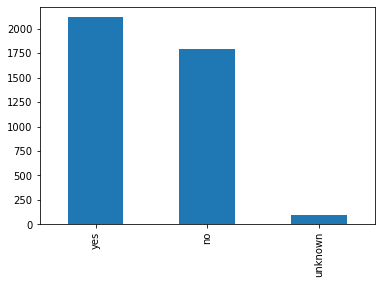

In [232]:
df_raw.has_housing_loan.unique(), df_raw.has_housing_loan.value_counts(), df_raw.has_housing_loan.value_counts().sum(), df_raw.has_housing_loan.value_counts().plot(kind='bar')

In [233]:
loan_type_dict = {'no': 0, 'yes': 1,  'unknown': 2}

df_data['has_housing_loan'] = df_data.apply(lambda x: loan_type_dict[x['has_housing_loan']], axis=1)
# if null set default to 2 unknown

#### has_personal_loan
has_personal_loan is categorical, so we need to encode it.

(<StringArray>
 ['no', 'yes', 'unknown']
 Length: 3, dtype: string,
 no         3335
 yes         573
 unknown      92
 Name: has_personal_loan, dtype: Int64,
 <AxesSubplot:>)

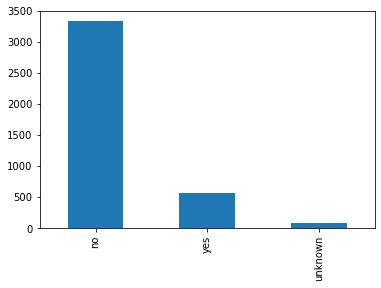

In [234]:
df_raw.has_personal_loan.unique(), df_raw.has_personal_loan.value_counts(
), df_raw.has_personal_loan.value_counts().plot(kind='bar')


In [235]:
loan_type_dict = {'no': 0, 'yes': 1,  'unknown': 2}
df_data['has_personal_loan'] = df_data.apply(lambda x: loan_type_dict[x['has_personal_loan']], axis=1)
# if null set default to 2 unknown

#### poutcome
poutcome is categorical, so we need to encode it.

(<StringArray>
 ['success', 'nonexistent', 'failure']
 Length: 3, dtype: string,
 nonexistent    3219
 failure         419
 success         362
 Name: poutcome, dtype: Int64,
 4000,
 <AxesSubplot:>)

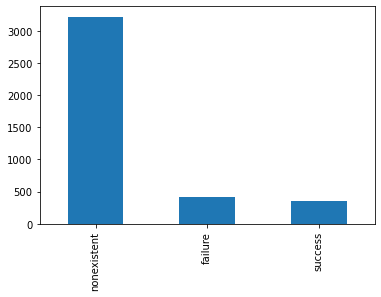

In [236]:
df_raw.poutcome.unique(), df_raw.poutcome.value_counts(), df_raw.poutcome.value_counts().sum(), df_raw.poutcome.value_counts().plot(kind='bar')

In [237]:
poutcome_type_dict = {'success': 1, 'failure': 0, 'nonexistent': 2}
df_data['poutcome'] = df_data.apply(lambda x: poutcome_type_dict[x['poutcome']], axis=1)
# if null set default to 2 nonexistent

Now, all the categorical features are encoded, and the rest are numeric except the date feature.

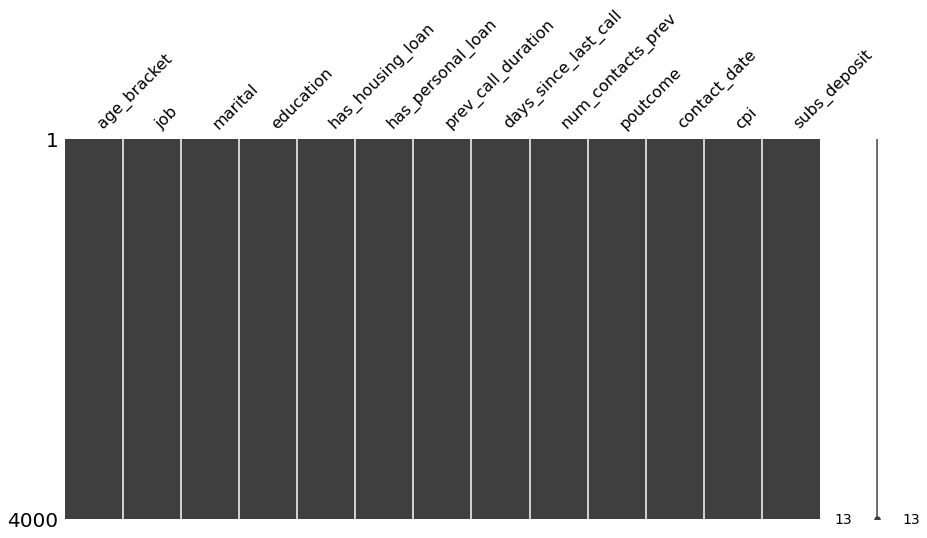

In [238]:
import missingno as msno
ax = msno.matrix(df_data, figsize=(15,7))
# msno.bar(df_data)

## There is no missing values.

#### subs_deposit (Target Label)

Target Label is already in the right format.

(0    2410
 1    1590
 Name: subs_deposit, dtype: int64,
 4000,
 <AxesSubplot:>)

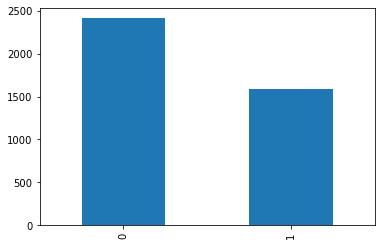

In [239]:
df_raw.subs_deposit.value_counts(), df_raw.subs_deposit.value_counts().sum(), df_raw.subs_deposit.value_counts().plot(kind='bar')

In [240]:
# for better visualization, we can convert the 1 to 'yes' and 'o' to 'no'.

### 04.2: Datetime Features

#### contact_date

Time is very important which can affect people's decision making due to other factors, such as holiday, news, weather, etc.

There are 50 unique date in the contact_date feature.

All is 2018. Thus the month and day are useful or informative.

If we can tell which month/week/day people want to save or spend money, this is a good feature.

In [241]:
df_raw.sort_values(by='contact_date').contact_date.value_counts().sum()

4000

50


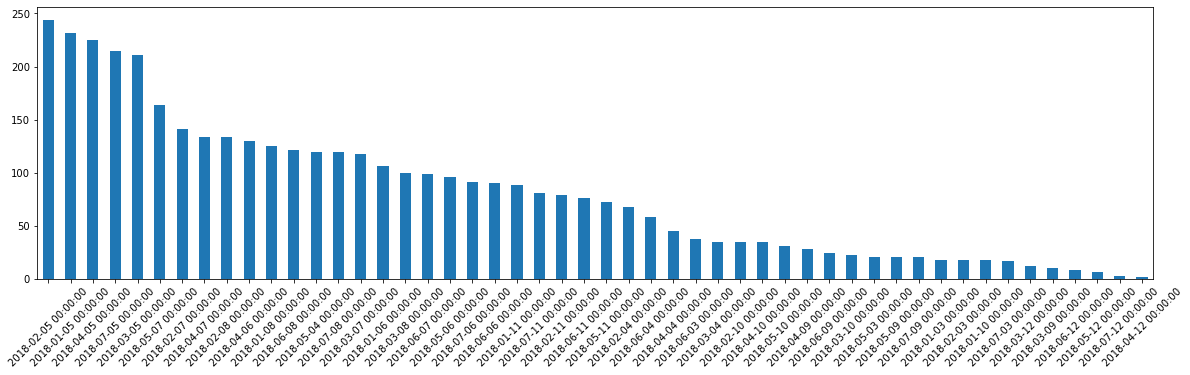

In [242]:
print(len(df_raw.contact_date.unique()))
# ax = df_raw.contact_date.value_counts().sort_values().plot(kind='bar', figsize=(20,5), rot=45)
ax = df_raw.sort_values(by='contact_date').contact_date.value_counts().plot(kind='bar', figsize=(20,5), rot=45)

In [243]:
# df_data.contact_date.dt.isocalendar().week # check python > 3.7

In [244]:
# we extend the data YYYY-MM-DD to to two features, month, weekday, and day
df_data['contact_month'] = df_data.contact_date.dt.month
df_data['contact_day'] = df_data.contact_date.dt.day
# we could also find the more granular features, like week and weekday
df_data['contact_week'] = df_data.contact_date.dt.isocalendar().week  # week of the year similar to the month but with more granularity
# we also care about people's mode on different days, for example, people who contacted on sunday, monday, tuesday, etc.
df_data['contact_weekday'] = df_data.contact_date.dt.weekday + 1 # weekday of the week, 1 is Monday, 7 is Sunday

In [245]:
df_data.contact_date.dt.year.value_counts()
# all the year feature is 2018

2018    4000
Name: contact_date, dtype: int64

In [246]:
df_data.contact_day.value_counts()

5     1127
7      656
8      599
6      513
11     396
4      325
10     141
3      110
9      102
12      31
Name: contact_day, dtype: int64

In [247]:
df_data.contact_month.value_counts()
# only Jan to July is in dataset

2    719
4    599
1    587
7    546
5    528
6    513
3    508
Name: contact_month, dtype: int64

In [248]:
df_data.contact_weekday.value_counts()
# all the weekday from Monday to Sunday are in dataset, this is great feature.

1    938
4    917
5    775
3    531
7    434
6    345
2     60
Name: contact_weekday, dtype: int64

In [249]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 41020 to 40631
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age_bracket           4000 non-null   int64         
 1   job                   4000 non-null   int64         
 2   marital               4000 non-null   int64         
 3   education             4000 non-null   int64         
 4   has_housing_loan      4000 non-null   int64         
 5   has_personal_loan     4000 non-null   int64         
 6   prev_call_duration    4000 non-null   int64         
 7   days_since_last_call  4000 non-null   int64         
 8   num_contacts_prev     4000 non-null   int64         
 9   poutcome              4000 non-null   int64         
 10  contact_date          4000 non-null   datetime64[ns]
 11  cpi                   4000 non-null   float64       
 12  subs_deposit          4000 non-null   int64         
 13  contact_month     

### 04.3: Numeric Features

#### prev_call_duration


In [250]:
df_raw.prev_call_duration.describe()

count      4000.000000
mean       3871.142250
std       26080.549053
min           2.000000
25%         131.000000
50%         237.000000
75%         461.000000
max      419900.000000
Name: prev_call_duration, dtype: float64

<font color='red'>The prev_call_duration mean value (3871.142250) is far away from the median value (237.). There may be outlier in this feature.</font>

In [251]:
461 / 60, 100000 / 60 / 60, 100,000 / 60 / 60 / 24, 419900 / 60 / 60 / 24

(7.683333333333334, 27.77777777777778, 100, 0.0, 4.859953703703703)

Take the 75% quantile 461 seconds, which is about 7~8 mins. 

100000 seconds is about 1.15 day ( 27 hours)

419900 seconds is about 5 days. Nobody will do this.

In [252]:
# check the upper bound
q1 = df_raw.prev_call_duration.quantile(0.25)
q3 = df_raw.prev_call_duration.quantile(0.75)
iqr = q3 - q1
# lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)

print(f' upper_bound: {upper_bound}')

 upper_bound: 956.0


In [15]:
956.0/60, 1400/60, 120000/60/60
# df_raw[df_raw.prev_call_duration < 1400].client_id.count() / 4000
# df_raw[df_raw.prev_call_duration < upper_bound].client_id.count() / 4000
# df_raw[df_raw.prev_call_duration >= 120000].client_id.count() / 4000

(15.933333333333334, 23.333333333333332, 33.333333333333336)

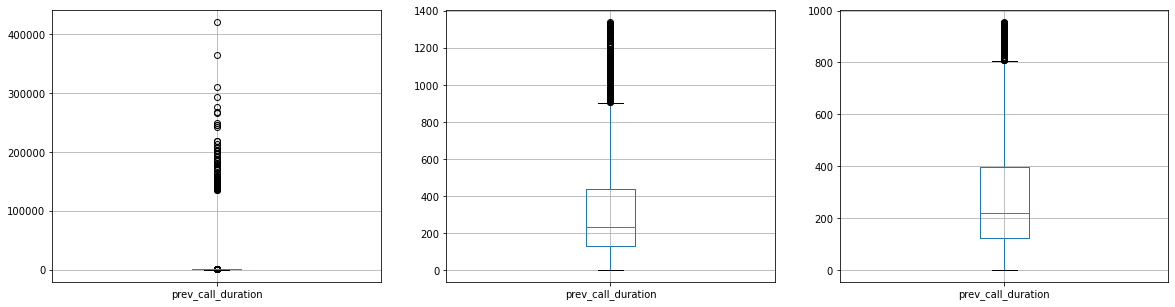

In [254]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df_raw.boxplot(column='prev_call_duration')
plt.subplot(1,3,2)
df_raw[df_raw.prev_call_duration < 120000].boxplot(column='prev_call_duration')
plt.subplot(1,3,3)
df_raw[df_raw.prev_call_duration < upper_bound].boxplot(
    column='prev_call_duration')
plt.show()


Base on observation, there are too many outliers in this feature.

700 seconds is about 12 mins, which is a reasonable value.

Even, 1400 seconds is about 24 mins, which is also a reasonable value.

But, >100,000 seconds is not reasonable value.

We may consider to drop this feature.

**Note**: I guess these >100,000 seconds records is 100 times larger than its real value. We find 79 records of this feature.

In [19]:
temp = df_raw[df_raw.prev_call_duration>120000]
temp[['client_id', 'prev_call_duration']] 

,client_id,prev_call_duration
212,21043,180600
232,32587,201600
304,15319,136300
430,39522,292600
445,34858,155400
...,...,...
3753,1700,151400
3756,33444,246200
3827,30674,419900
3877,22719,139000


In [256]:
temp.to_csv('../reports/client_with_very_long_call_duration.csv', index=False)

In [257]:
# hours to miniutes
120000/60/60, 1200/60, 4200/60

(33.333333333333336, 20.0, 70.0)

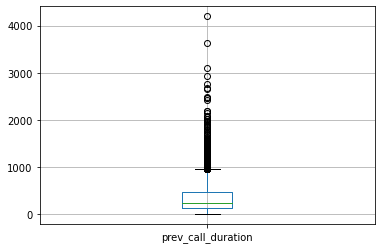

In [258]:
# we can revisit this change, now I choose to set these values to x/100.
df_data.prev_call_duration = df_data.prev_call_duration.apply(lambda x: x/100 if x > 120000 else x)
## or 
# df_data.prev_call_duration = df_data.prev_call_duration.apply(lambda x: None if x > 120000 else x)

# check the upper bound
df_data.prev_call_duration = df_data.prev_call_duration.apply(lambda x: x if x < 4200 else 4200)
ax = df_data.boxplot(column='prev_call_duration')


# 4200/60 is about 70 mins.

In [259]:
df_data.prev_call_duration.describe()

count    4000.000000
mean      354.315750
std       348.448736
min         2.000000
25%       131.000000
50%       237.000000
75%       461.000000
max      4199.000000
Name: prev_call_duration, dtype: float64

#### days_since_last_call

(array([  3,   6, 999,   7,  12,   8,  10,   4,  14,   2,   9,   5,  13,
         11,   0,   1,  27,  26,  17,  15,  18,  16,  22,  25]),
 4000,
 <AxesSubplot:>)

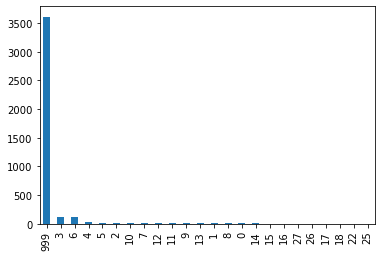

In [260]:
df_raw.days_since_last_call.unique(),df_raw.days_since_last_call.value_counts().sum(), df_raw.days_since_last_call.value_counts().plot(kind='bar') 

In [261]:
df_raw.days_since_last_call.describe()

count    4000.000000
mean      903.150750
std       293.323535
min         0.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: days_since_last_call, dtype: float64

We see most days_since_last_call is within 30 days. And the 999 used as a placeholder is not a good value.

 upper_bound: 999.0


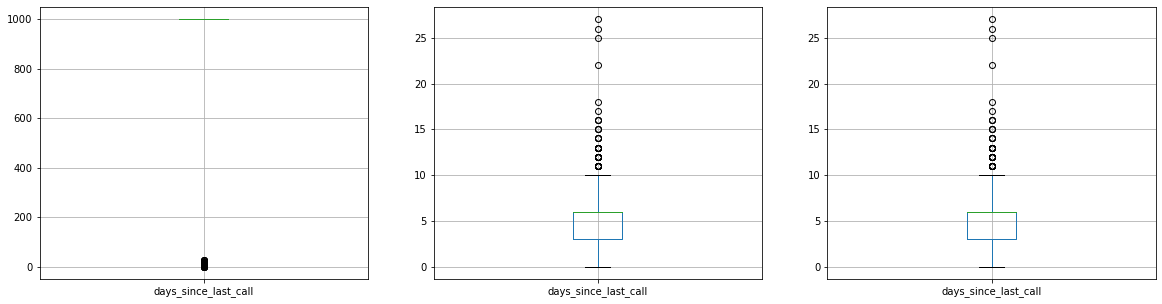

In [262]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
df_raw.boxplot(column='days_since_last_call')
plt.subplot(1, 3, 2)
df_raw[df_raw.days_since_last_call < 999].boxplot(
    column='days_since_last_call')
q1 = df_raw.days_since_last_call.quantile(0.25)
q3 = df_raw.days_since_last_call.quantile(0.75)
iqr = q3 - q1
# lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print(f' upper_bound: {upper_bound}')
plt.subplot(1, 3, 3)
df_raw[df_raw.days_since_last_call < upper_bound].boxplot(
    column='days_since_last_call')
plt.show()

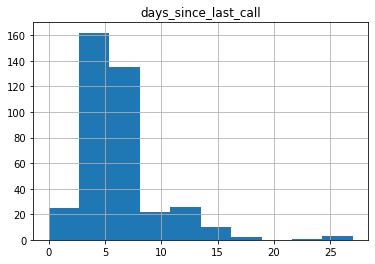

In [263]:
ax = df_raw[df_raw.days_since_last_call < 999].hist(
    column='days_since_last_call')

In [264]:
# -1 means never called, this feature maybe dropped
# we replace 999 with -1
df_data.days_since_last_call = df_data.days_since_last_call.apply(lambda x: -1 if x == 999 else x)

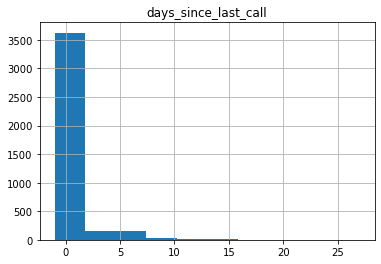

In [265]:
ax = df_data.hist(column='days_since_last_call')

In [266]:
# df_data.days_since_last_call.value_counts().plot(kind='bar')

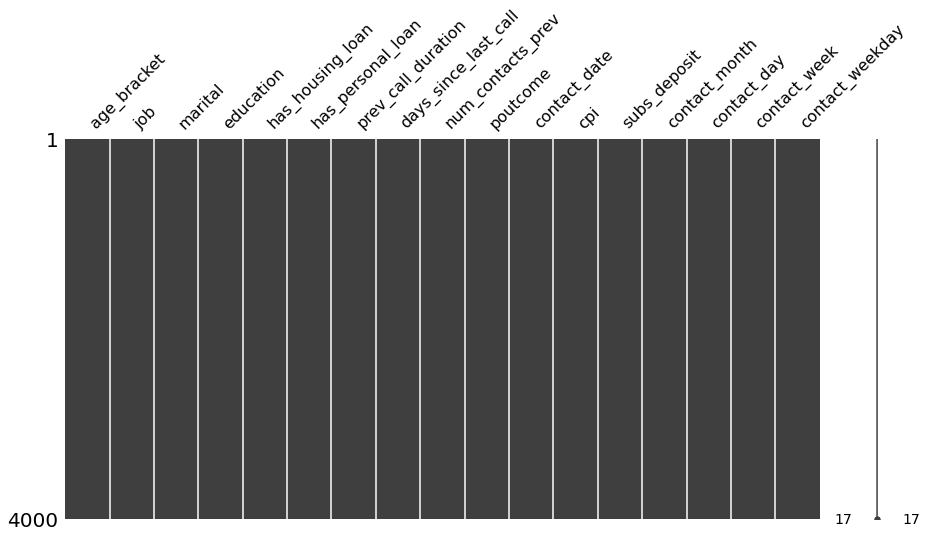

In [267]:
ax = msno.matrix(df_data, figsize=(15,7))

#### num_contacts_prev

num_contacts_prev is the number of contacts in the previous call.

(array([1, 2, 0, 5, 3, 6, 4]),
 0    3219
 1     567
 2     144
 3      54
 4      10
 5       5
 6       1
 Name: num_contacts_prev, dtype: int64,
 4000,
 <AxesSubplot:>)

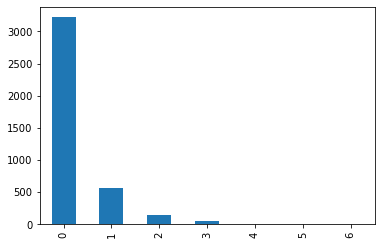

In [268]:
df_raw.num_contacts_prev.unique(), df_raw.num_contacts_prev.value_counts(), df_raw.num_contacts_prev.value_counts().sum(), df_raw.num_contacts_prev.value_counts().plot(kind='bar')

In [269]:
df_raw[df_raw.num_contacts_prev == 6]

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
188,31333,41-60,white-collar,divorced,bachelors,no,no,172,3,6,success,2018-02-08,94.027,1


There is only one client with num_contacts_prev = 6 and the results is sucessful.

In [270]:
df_phonecall_analysis = df_raw.copy()
df_phonecall = df_phonecall_analysis.num_contacts_prev.value_counts().to_frame(
    'num_contacts_prev')
df_phonecall[
    'cumsum_num_contacts_prev'] = df_phonecall.num_contacts_prev.cumsum()
df_phonecall[
    'ratio'] = df_phonecall.cumsum_num_contacts_prev / df_phonecall.num_contacts_prev.sum(
    )
df_phonecall

,num_contacts_prev,cumsum_num_contacts_prev,ratio
0,3219,3219,0.80475
1,567,3786,0.94650
2,144,3930,0.98250
3,54,3984,0.99600
4,10,3994,0.99850
5,5,3999,0.99975
6,1,4000,1.00000


We can also find about 80% has not been contacted before.

Only 20% received at least one phone call.

In [271]:
# Does the phone call really works ?
df_callwork = df_raw.groupby(by = ['num_contacts_prev','subs_deposit']).client_id.count().to_frame('client count')
df_callwork_sum = df_raw.groupby(by=['num_contacts_prev',
                                 ]).client_id.count().to_frame('sum of call work')
df_callwork_ratio = df_raw.groupby(
    by=['num_contacts_prev']).subs_deposit.value_counts(
        normalize=True).to_frame('client_ratio')
df_callwork['client_ratio'] = df_callwork_ratio.client_ratio
df_callwork

client count  client_ratio
num_contacts_prev subs_deposit                            
0                 0                     2136      0.663560
                  1                     1083      0.336440
1                 0                      233      0.410935
                  1                      334      0.589065
2                 0                       33      0.229167
                  1                      111      0.770833
3                 0                        5      0.092593
                  1                       49      0.907407
4                 0                        2      0.200000
                  1                        8      0.800000
5                 0                        1      0.200000
                  1                        4      0.800000
6                 1                        1      1.000000

In [272]:
# df_temp = df_callwork.copy().reset_index()
# df_temp = df_temp[df_temp.subs_deposit == 0]
# ax = df_temp.plot(x='num_contacts_prev',
#              y=['client count', 'client_ratio'],
#              kind='bar',
#              subplots=True,
#              figsize=(10, 5), title='Client Rejected the Term')


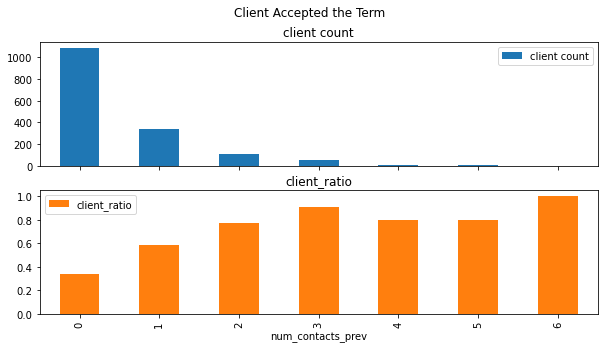

In [273]:
df_temp = df_callwork.copy().reset_index()
df_temp = df_temp[df_temp.subs_deposit == 1]
ax = df_temp.plot(x='num_contacts_prev',
             y=['client count', 'client_ratio'],
             kind='bar',
             subplots=True,
             figsize=(10, 5),
             title='Client Accepted the Term')


In [274]:
# Add a binary feature for the client being contacted
df_phonecall_analysis['contacted'] = df_phonecall_analysis.num_contacts_prev.apply(lambda x: 1 if x >= 1 else 0)
df_callwork = df_phonecall_analysis.groupby(
    by=['contacted', 'subs_deposit']).client_id.count().to_frame(
        'client count')
df_callwork_sum = df_phonecall_analysis.groupby(by=[
    'contacted',
]).client_id.count().to_frame('sum of call work')
df_callwork_ratio = df_phonecall_analysis.groupby(
    by=['contacted']).subs_deposit.value_counts(
        normalize=True).to_frame('client_ratio')
df_callwork['client_ratio'] = df_callwork_ratio.client_ratio
df_callwork

client count  client_ratio
contacted subs_deposit                            
0         0                     2136      0.663560
          1                     1083      0.336440
1         0                      274      0.350832
          1                      507      0.649168

We see a client is more likely to subscribe to a term deposit after been contacted (>=1).
The ratio increases from 33.6% to 64.9%.

#### cpi 
[???] The Consumer Price Index (CPI) measures household inflation and includes statistics about price change for categories of household expenditure


In [275]:
df_raw.cpi.describe()

count    4000.000000
mean      107.348378
std       107.885469
min        92.201000
25%        92.963000
50%        93.444000
75%        93.994000
max       947.670000
Name: cpi, dtype: float64

 upper_bound: 95.54050000000001


<AxesSubplot:>

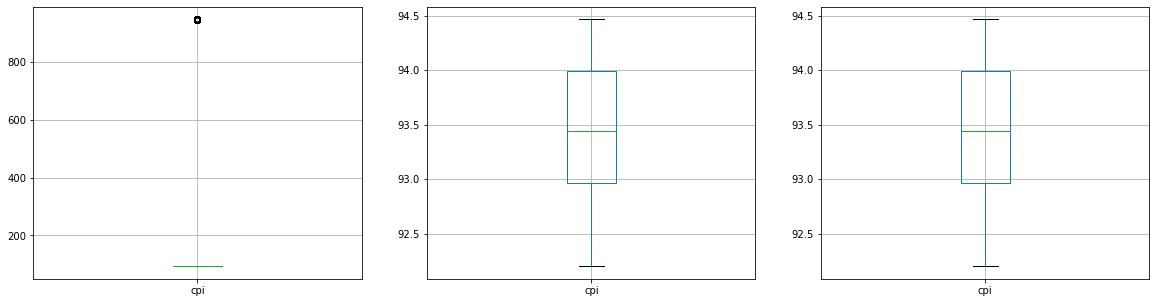

In [276]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
df_raw.boxplot(column='cpi')
plt.subplot(1, 3, 2)
df_raw[df_raw.cpi < 200].boxplot(
    column='cpi')
q1 = df_raw.cpi.quantile(0.25)
q3 = df_raw.cpi.quantile(0.75)
iqr = q3 - q1
# lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(f' upper_bound: {upper_bound}')
plt.subplot(1, 3, 3)
df_raw[df_raw.cpi < upper_bound].boxplot(
    column='cpi')

In [277]:
# ! ? Check cpi > 100 
df_raw[df_raw.cpi>100]['client_id'].count(), df_raw[df_raw.cpi>100]['client_id'].nunique()/4000

(65, 0.01625)

Clearly, we call tell there are 'errors' in the data.

We see most of the data is records is in xx.xxx format. 

But the cpi>100 shows that the data is not correct but in xxx.xx format.

**Note** 

Reason for the error: the cpi is not in the right format. The point is in the wrong position.

Possible solution is: $ cpi/10, where cpi>100 $

There are 65 samples have this issues.

In [16]:
df_temp = df_raw[df_raw.cpi>100] 
df_temp.to_csv('../reports/client_with_cpi_gt_100.csv', index=False)

In [18]:
df_temp[['client_id', 'cpi']]

,client_id,cpi
33,33914,947.67
54,34721,947.67
146,32685,946.01
174,32575,946.01
259,35583,947.67
...,...,...
3797,32557,946.01
3830,32704,946.01
3949,32955,946.01
3958,32840,946.01


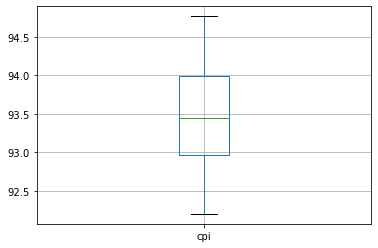

In [279]:
# Solution is we can remove the client with cpi > 100

# set cpi to null
# df_data.cpi = df_data.cpi.apply(lambda x: None if x > 100 else x)

# OR we can recalculate the cpi 
df_data.cpi = df_data.cpi.apply(lambda x: x/10 if x > 100 else x)

# set cpi upbound to 100
df_data.cpi = df_data.cpi.apply(lambda x: 100 if x > 100 else x)

ax = df_data.boxplot(column='cpi')
# thus there is no outliers here.

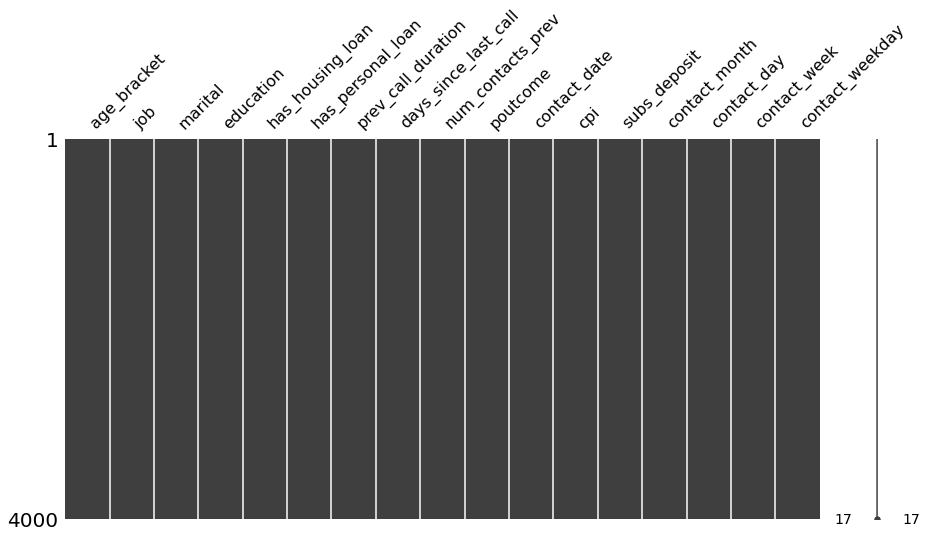

In [281]:
ax = msno.matrix(df_data, figsize=(15,7))

In [282]:
df_data.corr()

,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,cpi,subs_deposit,contact_month,contact_day,contact_week,contact_weekday
age_bracket,1.000000,0.045320,-0.108991,0.010181,0.002723,-0.028481,-0.014990,-0.000997,0.018839,0.004935,-0.001319,0.005899,-0.004664,0.085172,-0.001744,0.014556
job,0.045320,1.000000,0.011746,0.201726,0.009937,0.007951,0.010943,0.000854,-0.006201,-0.005690,0.007922,-0.004153,0.015493,0.017726,0.016936,-0.019748
marital,-0.108991,0.011746,1.000000,-0.004200,0.002151,-0.014826,0.007498,0.030183,0.040380,-0.023226,-0.015165,0.055603,-0.000482,-0.014296,-0.001101,-0.005056
education,0.010181,0.201726,-0.004200,1.000000,0.016287,0.025178,0.007063,0.016913,-0.021939,-0.015794,0.028663,-0.013589,0.024001,-0.005689,0.025024,-0.039590
has_housing_loan,0.002723,0.009937,0.002151,0.016287,1.000000,0.280387,-0.012751,0.017046,0.035113,-0.041041,-0.040155,0.015307,-0.012258,0.035481,-0.011396,0.006716
has_personal_loan,-0.028481,0.007951,-0.014826,0.025178,0.280387,1.000000,0.007950,-0.003298,0.018365,-0.017200,0.021233,-0.012477,0.015479,-0.018031,0.015189,-0.007738
prev_call_duration,-0.014990,0.010943,0.007498,0.007063,-0.012751,0.007950,1.000000,0.021634,-0.006538,0.022944,0.039229,0.478718,0.017727,-0.004943,0.018350,-0.029706
days_since_last_call,-0.000997,0.000854,0.030183,0.016913,0.017046,-0.003298,0.021634,1.000000,0.592432,-0.349226,-0.029613,0.264861,0.032254,0.091192,0.035814,-0.014715
num_contacts_prev,0.018839,-0.006201,0.040380,-0.021939,0.035113,0.018365,-0.006538,0.592432,1.000000,-0.758468,-0.119224,0.260981,0.028312,0.115908,0.032365,0.001569
poutcome,0.004935,-0.005690,-0.023226,-0.015794,-0.041041,-0.017200,0.022944,-0.349226,-0.758468,1.000000,0.243140,-0.175097,-0.032616,-0.073523,-0.034943,-0.006227


### Save the Processed Data

In [283]:
# save the data to the csv file in data/processed folder.
df_data.to_csv('../data/processed/df_data.csv')

In [284]:
df_data

,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit,contact_month,contact_day,contact_week,contact_weekday
client_id,,,,,,,,,,,,,,,,,
41020,3,1,3,1,1,0,283.0,3,1,1,2018-07-09,92.379,1,7,9,28,1
23720,4,4,3,2,0,1,169.0,6,2,1,2018-05-07,94.215,1,5,7,19,1
29378,3,1,1,1,0,0,552.0,-1,0,2,2018-01-08,93.444,1,1,8,2,1
36636,2,3,2,3,1,1,206.0,-1,0,2,2018-02-11,93.200,0,2,11,6,7
38229,1,1,2,1,0,0,341.0,-1,0,2,2018-04-04,93.075,1,4,4,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,3,7,2,2,1,0,396.0,-1,0,2,2018-02-05,92.893,1,2,5,6,1
29822,3,1,1,1,1,0,115.0,-1,0,2,2018-01-08,93.444,0,1,8,2,1
24462,2,1,1,3,1,0,214.0,-1,0,2,2018-06-07,93.918,0,6,7,23,4


In [ ]:
# Redo the profiling process again on new data.
# output_dir = '../reports/processed_data_profiling.html'
# profile = ProfileReport(df_data,
#                         title='Processed Data Profiling Report',
#                         html={'style': {
#                             'full_width': True
#                         }})
# profile.to_file(output_dir)

## 05: Feature Selection and Sample Selection

#### Drop Redundant Features 

contact_date is transformed to month, day and weekday, so we can drop the original contact_date feature.

In [ ]:
df_clean = df_data.copy() 

In [ ]:
df_clean.head().T

In [ ]:
# df_clean.contact_month.value_counts().sort_values()
# df_clean.contact_month.value_counts().sort_values()
# df_clean.contact_day.value_counts().sort_values()
df_clean.contact_weekday.value_counts().sort_values()

In [ ]:
# we can drop contact_date, because we already have the month, day and weekday to represent the time.
df_clean.drop(['contact_date', 'contact_month', 'contact_week', 'contact_day'], axis=1, inplace=True)

#### Drop Feature with Missing Values

In [ ]:
df_data.notna().sum().sort_values(ascending=False), df_data.notna().sum().sort_values(ascending=False).to_frame().boxplot()

In [ ]:
# drop features
# df_clean.drop(columns=['poutcome', 'days_since_last_call'], inplace=True)
# drop samples
df_clean.dropna(inplace=True)

In [ ]:
ax = msno.matrix(df_clean, figsize=(15, 7))

In [ ]:
# output_dir = '../reports/cleaned_data_profiling.html'
# profile = ProfileReport(df_clean, title='Clean Data Profiling Report')
# profile.to_file(output_dir)

In [ ]:
feature_name = 'contact_weekday'
# feature_name = 'contact_day'
# feature_name = 'contact_month'
# feature_name = 'contact_week'
df_temp = df_clean.groupby(
    by=[feature_name]).subs_deposit.value_counts().to_frame('client count')
df_temp['client ratio'] = df_clean.groupby(
    by=[feature_name]).subs_deposit.value_counts(
        normalize=True).to_frame('client ratio')['client ratio']
display(df_temp)

df_temp.reset_index(inplace=True)
df_temp[df_temp.subs_deposit==1].plot(x=feature_name,y=['client count','client ratio'],kind='bar',figsize=(10,5),title='Client Accepted the Term', subplots=True)

In [ ]:
df_clean.info()

In [ ]:
df_clean.head(5).T

In [ ]:
df_clean.to_csv('../data/processed/df_clean.csv')

## 06 Simple Raw Data Processing

- remove pre_call_duration >100000 seconds
- replace days_since_last_call 999 to -1
- remove cpi > 100 
- keep the reset of the data

In [9]:
df_raw

,client_id,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
0,41020,41-60,white-collar,divorced,bachelors,yes,no,283,3,1,success,2018-07-09,92.379,1
1,23720,60+,other,divorced,secondary,no,yes,169,6,2,success,2018-05-07,94.215,1
2,29378,41-60,white-collar,married,bachelors,no,no,552,999,0,nonexistent,2018-01-08,93.444,1
3,36636,25-40,technician,single,senior_secondary,yes,yes,206,999,0,nonexistent,2018-02-11,93.200,0
4,38229,18-24,white-collar,single,bachelors,no,no,341,999,0,nonexistent,2018-04-04,93.075,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,7519,41-60,entrepreneur,single,secondary,yes,no,396,999,0,nonexistent,2018-02-05,92.893,1
3996,29822,41-60,white-collar,married,bachelors,yes,no,115,999,0,nonexistent,2018-01-08,93.444,0
3997,24462,25-40,white-collar,married,senior_secondary,yes,no,214,999,0,nonexistent,2018-06-07,93.918,0
3998,26089,25-40,pink-collar,married,secondary,yes,no,76,999,0,nonexistent,2018-02-07,93.918,0


In [10]:
# make a copy of the raw data
df_clean_raw = df_raw.copy()
# set client_id as the index
df_clean_raw.set_index('client_id', inplace=True)
# normalize the prev_call duration.
# reset outliters
df_clean_raw.prev_call_duration = df_clean_raw.prev_call_duration.apply(lambda x: x/100 if x >120000 else x)
# set upperbound to 4200
df_clean_raw.prev_call_duration = df_clean_raw.prev_call_duration.apply(lambda x: x if x < 4200 else 4200)
# normalize the days_since_last_call, replace 999 to -1
df_clean_raw.days_since_last_call = df_clean_raw.days_since_last_call.apply(lambda x: -1 if x == 999 else x)
# normalize the cpi
# reset outliers
df_clean_raw.cpi = df_clean_raw.cpi.apply(lambda x: x/10 if x >100 else x)
# set upperbound to 100
df_clean_raw.cpi = df_clean_raw.cpi.apply(lambda x: 100 if x > 100 else x)
df_clean_raw.dropna(inplace=True)

# replace subs_deposit with Yes to 1 and No to 0
df_clean_raw.subs_deposit = df_clean_raw.subs_deposit.apply(lambda x: 'yes' if x == 1 else 'no')


df_clean_raw

,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit
client_id,,,,,,,,,,,,,
41020,41-60,white-collar,divorced,bachelors,yes,no,283.0,3,1,success,2018-07-09,92.379,yes
23720,60+,other,divorced,secondary,no,yes,169.0,6,2,success,2018-05-07,94.215,yes
29378,41-60,white-collar,married,bachelors,no,no,552.0,-1,0,nonexistent,2018-01-08,93.444,yes
36636,25-40,technician,single,senior_secondary,yes,yes,206.0,-1,0,nonexistent,2018-02-11,93.200,no
38229,18-24,white-collar,single,bachelors,no,no,341.0,-1,0,nonexistent,2018-04-04,93.075,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,41-60,entrepreneur,single,secondary,yes,no,396.0,-1,0,nonexistent,2018-02-05,92.893,yes
29822,41-60,white-collar,married,bachelors,yes,no,115.0,-1,0,nonexistent,2018-01-08,93.444,no
24462,25-40,white-collar,married,senior_secondary,yes,no,214.0,-1,0,nonexistent,2018-06-07,93.918,no


In [11]:
df_clean_raw.to_csv('../data/processed/df_clean_raw.csv')

In [12]:
df_clean_raw['contact_month'] = df_clean_raw.contact_date.dt.month
df_clean_raw['contact_day'] = df_clean_raw.contact_date.dt.day
# we could also find the more granular features, like week and weekday
df_clean_raw['contact_week'] = df_clean_raw.contact_date.dt.isocalendar().week  # week of the year similar to the month but with more granularity
# we also care about people's mode on different days, for example, people who contacted on sunday, monday, tuesday, etc.
df_clean_raw['contact_weekday'] = df_clean_raw.contact_date.dt.weekday + 1 # weekday of the week, 1 is Monday, 7 is Sunday

In [13]:
df_clean_raw

,age_bracket,job,marital,education,has_housing_loan,has_personal_loan,prev_call_duration,days_since_last_call,num_contacts_prev,poutcome,contact_date,cpi,subs_deposit,contact_month,contact_day,contact_week,contact_weekday
client_id,,,,,,,,,,,,,,,,,
41020,41-60,white-collar,divorced,bachelors,yes,no,283.0,3,1,success,2018-07-09,92.379,yes,7,9,28,1
23720,60+,other,divorced,secondary,no,yes,169.0,6,2,success,2018-05-07,94.215,yes,5,7,19,1
29378,41-60,white-collar,married,bachelors,no,no,552.0,-1,0,nonexistent,2018-01-08,93.444,yes,1,8,2,1
36636,25-40,technician,single,senior_secondary,yes,yes,206.0,-1,0,nonexistent,2018-02-11,93.200,no,2,11,6,7
38229,18-24,white-collar,single,bachelors,no,no,341.0,-1,0,nonexistent,2018-04-04,93.075,yes,4,4,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,41-60,entrepreneur,single,secondary,yes,no,396.0,-1,0,nonexistent,2018-02-05,92.893,yes,2,5,6,1
29822,41-60,white-collar,married,bachelors,yes,no,115.0,-1,0,nonexistent,2018-01-08,93.444,no,1,8,2,1
24462,25-40,white-collar,married,senior_secondary,yes,no,214.0,-1,0,nonexistent,2018-06-07,93.918,no,6,7,23,4


In [14]:
df_clean_raw.to_csv('../data/processed/df_clean_raw_enhanced.csv')

## END